<a href="https://colab.research.google.com/github/Litzu10/python1/blob/master/tensorflow_HW0324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


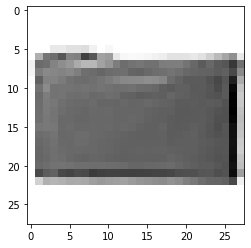

In [32]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

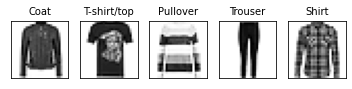

In [33]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [0]:
x_train = x_train/255
x_test = x_test/255

In [35]:
x_train.shape

(60000, 28, 28)

In [36]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train.reshape(60000,784)/255

In [0]:
x_test = x_test.reshape(10000,784)/255

In [0]:
from tensorflow.keras.utils import to_categorical 

In [0]:
y_train = to_categorical(y_train, 10)

In [0]:
y_test = to_categorical(y_test, 10)

In [0]:
#打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()
model.add(Dense(25, input_dim=784, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                19625     
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                260       
Total params: 20,535
Trainable params: 20,535
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0900 - acc: 0.1745
Epoch 2/20
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0900 - acc: 0.2302
Epoch 3/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0900 - acc: 0.1525
Epoch 4/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0900 - acc: 0.1947
Epoch 5/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0900 - acc: 0.2514
Epoch 6/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0900 - acc: 0.2441
Epoch 7/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0900 - acc: 0.2432
Epoch 8/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0900 - acc: 0.2611
Epoch 9/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0900 - acc: 0.2495
Epoch 10/20
60000/60000 [==============================] - 

In [0]:
#訓練結果

In [0]:
result = model.predict_classes(x_test)

神經網路預測是: Sneaker


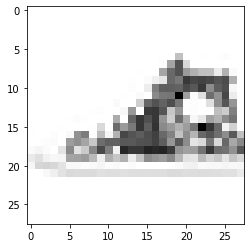

In [53]:
n = 3256

print('神經網路預測是:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

In [52]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.0900 - acc: 0.2651


[0.08997765698432922, 0.2651]